In [1]:
from functions.crop_image import random_crop
from functions.load_training_data import training_samples
from skimage import io
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Load training samples

In [2]:
training_images, training_labels = training_samples(1000, [1,1,1,1])

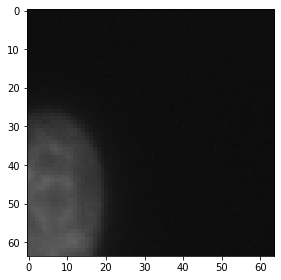

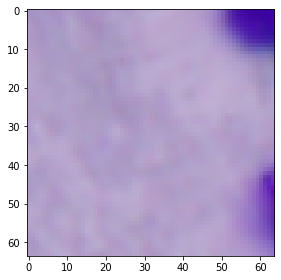

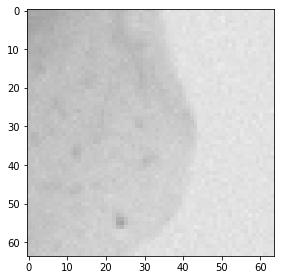

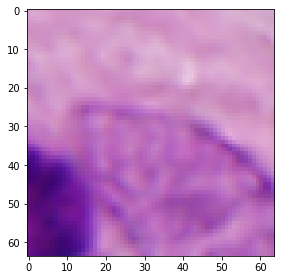

<Figure size 432x288 with 0 Axes>

In [3]:
count = 0
for i in training_images:
    io.imshow(i)
    plt.figure()

    if count == 3: 
        break
    
    count += 1

# Configure GPU for training

In [4]:
from functions.tf_config import config_gpu

config_gpu(5, True)

8 Physical GPUs, 1 Logical GPU
Configured to run on GPU 5


# Create model
* be sure that final dense layer reflects the number of categories we're training for

In [5]:
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, input_shape=(64, 64, 3), activation='relu', strides=(2,2)),
    keras.layers.Conv2D(16, 3, activation='relu', strides=(2,2)),
    keras.layers.Conv2D(8, 3, activation='relu', strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(4)
])

In [6]:
predictions = model(training_images).numpy()
predictions

array([[ 0.00535786,  0.0358635 ,  0.00385363, -0.03104192],
       [ 0.06811693,  0.3557868 ,  0.00989656, -0.2415995 ],
       [ 0.09462306,  0.42450008, -0.01175974, -0.26317555],
       ...,
       [ 0.08608678,  0.41454458,  0.00773038, -0.27085888],
       [ 0.07338068,  0.3734619 , -0.00142467, -0.24115497],
       [ 0.07302281,  0.31964588,  0.00437462, -0.21548268]],
      dtype=float32)

In [7]:
tf.nn.softmax(predictions).numpy()

array([[0.25039265, 0.25814876, 0.2500163 , 0.24144231],
       [0.24935082, 0.3324637 , 0.23524804, 0.18293746],
       [0.25068367, 0.34865007, 0.22538477, 0.1752815 ],
       ...,
       [0.24917336, 0.34605813, 0.23039436, 0.17437415],
       [0.24949972, 0.3368168 , 0.23151681, 0.18216671],
       [0.252351  , 0.32293275, 0.2356088 , 0.18910745]], dtype=float32)

In [8]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(training_labels, predictions).numpy()

1.4081362

In [9]:
opt = keras.optimizers.Adam(learning_rate=.0001)
model.compile(optimizer=opt,
             loss=loss_fn,
             metrics=['accuracy'])

In [10]:
model.fit(training_images, training_labels, epochs=5, validation_split=.01)

Epoch 1/5
124/124 [==============================] - 1s 8ms/step - loss: 1.0485 - accuracy: 0.5293 - val_loss: 0.5660 - val_accuracy: 0.7500
Epoch 2/5
124/124 [==============================] - 1s 6ms/step - loss: 0.2700 - accuracy: 0.9210 - val_loss: 0.1768 - val_accuracy: 0.9250
Epoch 3/5
124/124 [==============================] - 1s 6ms/step - loss: 0.1062 - accuracy: 0.9705 - val_loss: 0.1508 - val_accuracy: 0.9500
Epoch 4/5
124/124 [==============================] - 1s 6ms/step - loss: 0.0804 - accuracy: 0.9735 - val_loss: 0.1148 - val_accuracy: 0.9750
Epoch 5/5
124/124 [==============================] - 1s 5ms/step - loss: 0.0753 - accuracy: 0.9753 - val_loss: 0.1071 - val_accuracy: 0.9750


In [11]:
# use model.predict to test model
# use the trained model on a random image crop
# create an example of how to use the model once it's trained
# do the same in the regression model (with the predicted avg. size instead of color)

In [12]:
from functions.plot_predictions import plot_image, plot_value_array

In [13]:
probability_model = keras.Sequential([model, 
                                     keras.layers.Softmax()])
predictions = probability_model.predict(training_images)

In [14]:
predictions[0]

array([9.9945897e-01, 4.7723617e-04, 6.3617990e-05, 1.2956086e-07],
      dtype=float32)

In [18]:
test_images, test_labels = training_samples(1, [1,1,1,1])

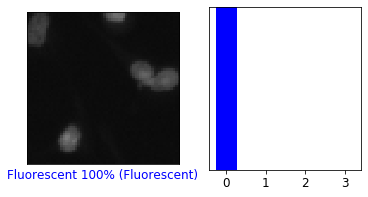

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

<Figure size 864x432 with 0 Axes>

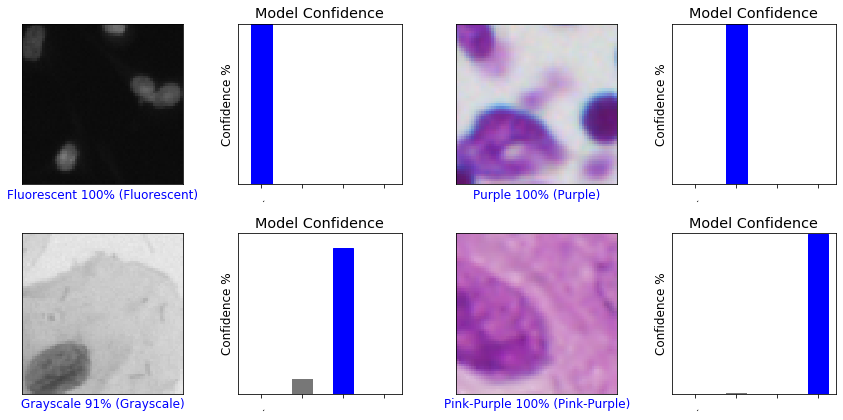

In [20]:
num_rows = 2
num_cols = 2
num_images = num_rows * num_cols

plt.figure(figsize=(2*3*num_cols, 3*num_rows))
plt.rcParams.update({'font.size': 12})
class_names = [".", ".", ".", "."]

plt.subplots(num_rows, num_cols, figsize=(12,6))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plt.bar(x=class_names,
           height="Confidence")
    plt.title("Model Confidence")
    plt.ylabel("Confidence %")
    plt.xticks(rotation=45)
    plot_value_array(i, predictions[i], test_labels)
    
plt.tight_layout()
plt.show()
